In [1]:
!pip install pandas
!pip install numpy

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load user data

users_df = pd.read_csv('takehome_users.csv', encoding = "ISO-8859-1")
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,22/4/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,15/11/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,19/3/2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,21/5/2013 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,17/1/2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
# Load engagement data

engagement_df = pd.read_csv('takehome_user_engagement.csv', parse_dates=['time_stamp'])
engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:00,1,1
1,2013-11-15 03:45:00,2,1
2,2013-11-29 03:45:00,2,1
3,2013-09-12 03:45:00,2,1
4,2013-12-25 03:45:00,2,1


In [6]:
# Check for missing values in user data

users_df.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [7]:
# Check for missing values in engagement data

engagement_df.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [10]:
# Remove duplicate rows from user data

users_df.drop_duplicates(subset='object_id', inplace=True)
users_df.drop_duplicates

<bound method DataFrame.drop_duplicates of        object_id    creation_time               name  \
0              1   22/4/2014 3:53     Clausen August   
1              2  15/11/2013 3:45      Poole Matthew   
2              3  19/3/2013 23:14  Bottrill Mitchell   
3              4   21/5/2013 8:09    Clausen Nicklas   
4              5  17/1/2013 10:14          Raw Grace   
...          ...              ...                ...   
11995      11996    6/9/2013 6:14       Meier Sophia   
11996      11997  10/1/2013 18:28      Fisher Amelie   
11997      11998  27/4/2014 12:45        Haynes Jake   
11998      11999  31/5/2012 11:55       Faber Annett   
11999      12000   26/1/2014 8:57         Lima Thaís   

                            email     creation_source  \
0        AugustCClausen@yahoo.com        GUEST_INVITE   
1          MatthewPoole@gustr.com          ORG_INVITE   
2      MitchellBottrill@gustr.com          ORG_INVITE   
3       NicklasSClausen@yahoo.com        GUEST_INVITE   

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Calculate the number of adopted users

adopted_users = engagement_df.groupby('user_id').rolling(window=7, on='time_stamp').count()['visited'] >= 3
adopted_users 

user_id        
1        0         False
2        1         False
         2         False
         3          True
         4          True
                   ...  
11996    207912    False
11997    207913    False
11998    207914    False
11999    207915    False
12000    207916    False
Name: visited, Length: 207917, dtype: bool

In [48]:
# Calculate the adoption rate

adoption_rate = adopted_users / len(users_df) * 100
print(adoption_rate)

user_id        
1        0         0.000000
2        1         0.000000
         2         0.000000
         3         0.008333
         4         0.008333
                     ...   
11996    207912    0.000000
11997    207913    0.000000
11998    207914    0.000000
11999    207915    0.000000
12000    207916    0.000000
Name: visited, Length: 207917, dtype: float64


In [26]:
# Calculate the number of users for each creation source

creation_source_counts = users_df['creation_source'].value_counts()
creation_source_counts

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [27]:
# Plot the distribution of users across creation sources

import matplotlib.pyplot as plt

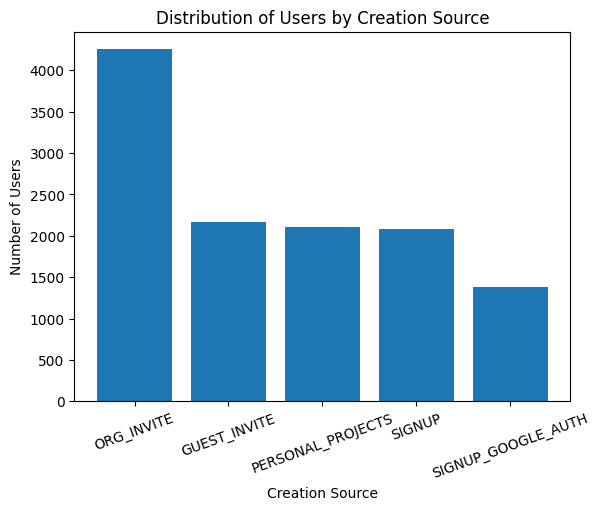

In [28]:
# Plot the distribution of users across creation sources

plt.bar(creation_source_counts.index, creation_source_counts.values)
plt.title('Distribution of Users by Creation Source')
plt.xlabel('Creation Source')
plt.ylabel('Number of Users')
plt.xticks(rotation=20)
plt.show()

In [52]:
# Merge the user data with the adopted user data

user_adoption = pd.merge(users_df, adopted_users, how='left', left_on='object_id', right_on=user_id)
user_adoption['adopted'] = user_adoption['visited']
user_adoption.drop(['visited'], axis=1, inplace=True)

NameError: name 'user_id' is not defined

In [41]:
# Calculate the average time between account creation and last login for adopted and non-adopted users

avg_time_adoption = user_adoption[user_adoption['adopted'] == 1]['last_session_creation_time'].mean()
avg_time_adoption

NameError: name 'user_adoption' is not defined

In [42]:
avg_time_non_adoption = user_adoption[user_adoption['adopted'] == 0]['last_session_creation_time'].mean()
avg_time_non_adoption

NameError: name 'user_adoption' is not defined

In [43]:
print('Average time between account creation and last login for adopted users:', avg_time_adoption)

NameError: name 'avg_time_adoption' is not defined

In [44]:
print('Average time between account creation and last login for non-adopted users:', avg_time_non_adoption)

NameError: name 'avg_time_non_adoption' is not defined

# Conclusion:

In [ ]:
In conclusion, to increase user adoption, companies may want to focus on targeting users who signed up via organization 
invites and those who have opted in to the mailing list.